In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from decpomdp import DecPOMDP
from problem import PROBLEM
import gc 
gc.enable()

In [2]:
problem_name = "prisoners"
planning_horizon = 2
gametype = "stackelberg"
sota = False
num_iterations = 3

PROBLEM.initialize(DecPOMDP(problem_name,horizon=planning_horizon))
from beliefSpace import BeliefSpace
from pbvi import PBVI



In [3]:
problem = PROBLEM.get_instance()
print(problem.STATES)
print(problem.JOINT_ACTIONS)
print(problem.JOINT_OBSERVATIONS)
for type,matrix in problem.REWARDS.items():
    print(type)
    print(f"leader :\n{matrix[0]}\nfollower : \n{matrix[1]}")


[0]
[0, 1, 2, 3]
[0, 1, 2, 3]
cooperative
leader :
[[ -1.]
 [-10.]
 [  0.]
 [ -5.]]
follower : 
[[ -1.]
 [-10.]
 [  0.]
 [ -5.]]
zerosum
leader :
[[ -1.]
 [-10.]
 [  0.]
 [ -5.]]
follower : 
[[ 1.]
 [10.]
 [-0.]
 [ 5.]]
stackelberg
leader :
[[ -1.]
 [-10.]
 [  0.]
 [ -5.]]
follower : 
[[  0.]
 [ -9.]
 [-10.]
 [ -6.]]


In [4]:
# check belief objects and expansion

bs = BeliefSpace(planning_horizon,density=0.00001)
bs.expansion()
bs.print_network()
bs.print_belief_table()

	belief expansion done, belief space size = 3

  ∟ belief 0 : [1.]
      ∟ action 0, observation 0 : belief 1
      ∟ action 1, observation 1 : belief 0
      ∟ action 2, observation 2 : belief 0
      ∟ action 3, observation 3 : belief 0
  ∟ belief 1 : [1.]
      ∟ action 0, observation 0 : belief 0
      ∟ action 1, observation 1 : belief 0
      ∟ action 2, observation 2 : belief 0
      ∟ action 3, observation 3 : belief 0
0 : {0} 
1 : {0, 1} 
2 : {0, 1} 


In [5]:
from experiment import Experiment
experiment = Experiment(planning_horizon,num_iterations,algorithm="maxplane")
experiment.run_single_experiment(planning_horizon,gametype="stackelberg",sota=False)


			 Solving stackelberg prisoners GAME Horizon 2 WITH SOTA = False  
iteration : 1
	belief expansion done, belief space size = 3


========== Backup at timestep 1 ==========
		belief: 0 = [1.] , 	leader value: -6.538461538461538, 	follower value (by state):  [-6.92307692]
		belief: 1 = [1.] , 	leader value: -6.538461538461538, 	follower value (by state):  [-6.92307692]

========== Backup at timestep 0 ==========
		belief: 0 = [1.] , 	leader value: -6.846153846153846, 	follower value (by state):  [-13.84615385]



================================================= END OF stackelberg GAME WITH SOTA False ================================================================

				 alphavectors value at inital belief (V0,V1) : leader =  -6.846153846153846 , follower = [-13.84615385]

iteration : 2
	belief expansion done, belief space size = 3


========== Backup at timestep 1 ==========
		belief: 0 = [1.] , 	leader value: -6.538461538461538, 	follower value (by state):  [-6.92307692]
		belief: 1 

([-6.846153846153846, -6.846153846153846, -6.846153846153846],
 [array([-13.84615385]), array([-13.84615385]), array([-13.84615385])],
 [0.15118789672851562, 0.06064486503601074, 0.06793403625488281])

In [6]:
experiment.run_experiments()

			 Solving cooperative prisoners GAME Horizon 1 WITH SOTA = False  
iteration : 1
	belief expansion done, belief space size = 3


========== Backup at timestep 0 ==========
		belief: 0 = [1.] , 	leader value: 0.0, 	follower value (by state):  [0.]



================================================= END OF cooperative GAME WITH SOTA False ================================================================

				 alphavectors value at inital belief (V0,V1) : leader =  0.0 , follower = [0.]

iteration : 2
	belief expansion done, belief space size = 3


========== Backup at timestep 0 ==========
		belief: 0 = [1.] , 	leader value: 0.0, 	follower value (by state):  [0.]



================================================= END OF cooperative GAME WITH SOTA False ================================================================

				 alphavectors value at inital belief (V0,V1) : leader =  0.0 , follower = [0.]

iteration : 3
	belief expansion done, belief space size = 3


========== Backup at ti

,gametype,SOTA,horizon,iterations,time,number_of_beliefs,leader values,follower values,density
0,cooperative,Stackelberg,1,3,"[0.020399093627929688, 0.016895055770874023, 0...",3,"[0.0, 0.0, 0.0]","[[0.0], [0.0], [0.0]]",0.000001
1,cooperative,Stackelberg,2,3,"[0.04791378974914551, 0.04826521873474121, 0.0...",3,"[0.0, 0.0, 0.0]","[[0.0], [0.0], [0.0]]",0.000001
2,cooperative,State of the Art,1,3,"[0.00096893310546875, 0.0007479190826416016, 0...",3,"[0.0, 0.0, 0.0]","[[0.0], [0.0], [0.0]]",0.000001
3,cooperative,State of the Art,2,3,"[0.0014872550964355469, 0.0013549327850341797,...",3,"[0.0, 0.0, 0.0]","[[0.0], [0.0], [0.0]]",0.000001
4,zerosum,Stackelberg,1,3,"[0.01804208755493164, 0.017581939697265625, 0....",3,"[-5.0, -5.0, -5.0]","[[5.0], [5.0], [5.0]]",0.000001
5,zerosum,Stackelberg,2,3,"[0.04875326156616211, 0.04490017890930176, 0.0...",3,"[-10.0, -10.0, -10.0]","[[10.0], [10.0], [10.0]]",0.000001
6,zerosum,State of the Art,1,3,"[0.02859187126159668, 0.02890610694885254, 0.0...",3,"[-5.0, -5.0, -5.0]","[[5.0], [5.0], [5.0]]",0.000001
7,zerosum,State of the Art,2,3,"[0.08224606513977051, 0.0790250301361084, 0.08...",3,"[-10.0, -10.0, -10.0]","[[10.0], [10.0], [10.0]]",0.000001
8,stackelberg,Stackelberg,1,3,"[0.02380204200744629, 0.024466753005981445, 0....",3,"[-6.538461538461538, -6.538461538461538, -6.53...","[[-6.9230769230769225], [-6.9230769230769225],...",0.000001
9,stackelberg,Stackelberg,2,3,"[0.06409287452697754, 0.06232285499572754, 0.0...",3,"[-6.846153846153846, -6.846153846153846, -6.84...","[[-13.846153846153847], [-13.846153846153847],...",0.000001


In [7]:
tables = experiment.generate_summary_table()
tables["zerosum"]

State of the Art                             PBVI               \
                         time leader value iteration      time leader value   
prisoners(0)         0.029875         -5.0         3  0.019851         -5.0   
prisoners(1)         0.080876        -10.0         3  0.049591        -10.0   

                        
             iteration  
prisoners(0)         3  
prisoners(1)         3

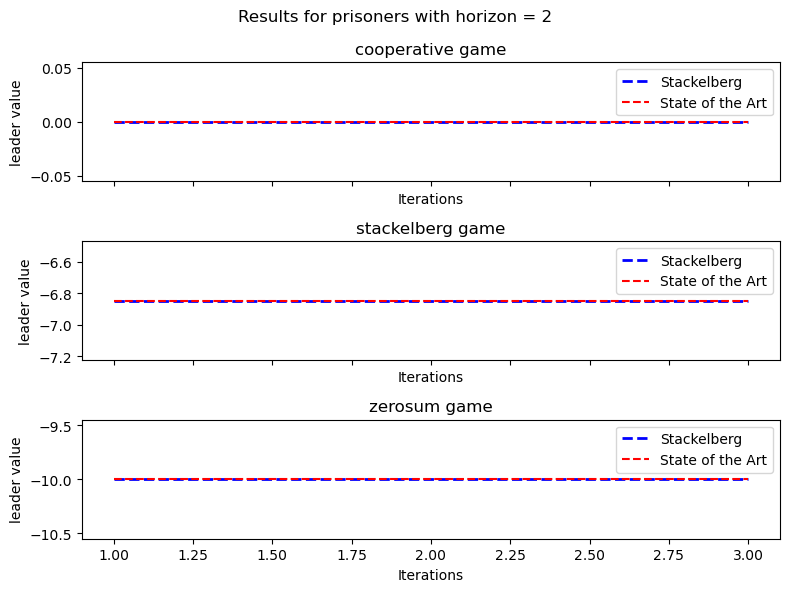

In [8]:
experiment.plots()